# Visualization Methods for COVID-19 Data

## 1. Initialization

### 1.1 Import libraries

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

### 1.2 Define useful paths in the project.

In [2]:
import os
proj_dir = os.getcwd()
data_dir = os.path.join(proj_dir, 'data')
jhu_dir = os.path.join(data_dir, 'jhu')
data_output_dir = os.path.join(data_dir, 'output')

## 2.   Load Data

### 2.1. Get the filename of the latest version of the transformed data.

In [3]:
import re
latest_csv = [c for c in sorted(os.listdir(data_output_dir)) if re.search('cnty_total_confirmed_cases_\d{8}-\d{6}\.csv', c)][-1]
latest_csv

'cnty_total_confirmed_cases_20220328-115912.csv'

### 2.2 Load the transformed data to DataFrame ```df_full_data```.

In [4]:
df_full_data = pd.read_csv(os.path.join(data_output_dir, latest_csv), index_col='iso3')
df_full_data

,Country/Region,Latitude,Longitude,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
iso3,,,,,,,,,,,,,,,,,,,,,
ABW,"Aruba, Netherlands",12.521100,-69.968300,106766.0,0,0,0,0,0,0,...,33843,33843,33843,33843,33843,33843,33843,33929,33929,33929
AFG,Afghanistan,33.939110,67.709953,38928341.0,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
AGO,Angola,-11.202700,17.873900,32866268.0,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115
AIA,"Anguilla, United Kingdom",18.220600,-63.068600,15002.0,0,0,0,0,0,0,...,2595,2595,2595,2595,2633,2633,2633,2633,2633,2633
ALB,Albania,41.153300,20.168300,2877800.0,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKS,Kosovo,42.602636,20.902977,1810366.0,0,0,0,0,0,0,...,227057,227093,227124,227150,227191,227231,227265,227296,227324,227361
YEM,Yemen,15.552727,48.516388,29825968.0,0,0,0,0,0,0,...,11797,11799,11801,11801,11802,11802,11803,11803,11803,11803
ZAF,South Africa,-30.559500,22.937500,59308690.0,0,0,0,0,0,0,...,3700484,3703329,3704218,3704784,3705696,3705696,3709209,3710766,3712263,3713252


### 2.3 Select Countries Information data from ```df_full_data``` and assign to ```df_cnty_info```.

In [5]:
df_cnty_info = df_full_data.iloc[:,:4]
df_cnty_info

,Country/Region,Latitude,Longitude,Population
iso3,,,,
ABW,"Aruba, Netherlands",12.521100,-69.968300,106766.0
AFG,Afghanistan,33.939110,67.709953,38928341.0
AGO,Angola,-11.202700,17.873900,32866268.0
AIA,"Anguilla, United Kingdom",18.220600,-63.068600,15002.0
ALB,Albania,41.153300,20.168300,2877800.0
...,...,...,...,...
XKS,Kosovo,42.602636,20.902977,1810366.0
YEM,Yemen,15.552727,48.516388,29825968.0
ZAF,South Africa,-30.559500,22.937500,59308690.0


### 2.4 Select cases data from ```df_full_data``` and assign to ```df_total_cases```.

In [6]:
df_total_cases = df_full_data.iloc[:,4:]
df_total_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
iso3,,,,,,,,,,,,,,,,,,,,,
ABW,0,0,0,0,0,0,0,0,0,0,...,33843,33843,33843,33843,33843,33843,33843,33929,33929,33929
AFG,0,0,0,0,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
AGO,0,0,0,0,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115
AIA,0,0,0,0,0,0,0,0,0,0,...,2595,2595,2595,2595,2633,2633,2633,2633,2633,2633
ALB,0,0,0,0,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKS,0,0,0,0,0,0,0,0,0,0,...,227057,227093,227124,227150,227191,227231,227265,227296,227324,227361
YEM,0,0,0,0,0,0,0,0,0,0,...,11797,11799,11801,11801,11802,11802,11803,11803,11803,11803
ZAF,0,0,0,0,0,0,0,0,0,0,...,3700484,3703329,3704218,3704784,3705696,3705696,3709209,3710766,3712263,3713252


### 2.5 Transform ```df_total_cases```.

-   Transpose the data so that ```Date``` be the index, and the number of cases of countries/regions be the columns.

In [7]:
df_total_cases = df_total_cases.T
df_total_cases.index.name = 'Date'
df_total_cases.index = pd.to_datetime(df_total_cases.index)
df_total_cases

iso3,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATA,...,VGB,VNM,VUT,WLF,WSM,XKS,YEM,ZAF,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,33843,177321,99058,2633,273164,39713,888718,9019660,422382,11,...,6104,8479751,1373,454,295,227231,11802,3705696,316190,244958
2022-03-24,33843,177321,99081,2633,273257,39713,889108,9021240,422401,11,...,6104,8599751,1704,454,796,227265,11803,3709209,316312,245194
2022-03-25,33929,177321,99102,2633,273318,39713,889456,9023812,422423,11,...,6141,8761252,1963,454,796,227296,11803,3710766,316422,245645


## 3. Functions for Visualization

###  3.1 Show the data of a Selected Country/Region

```show_cnty_for_days(cnty, history=30)``` shows two charts.
1. A bar chart shows the daily total number of cases in the selected country/region.
2. A bar and line combined chart shows the daily new cases and the average number of new cases in the past 7 days of the selected country/region.

```show_cnty_for_days(cnty, history=30)``` accepts two parameters, namely ```cnty``` and ```history```.
- ```cnty``` is the ```str``` of the ```iso3``` of the selected country/region.
-   ```history``` is an ```int``` of the number of days that the chart shows, default is ```30```.

In [8]:
def show_cnty_for_days(cnty, history=30):
    cnty = cnty_validation(cnty)[0]
    history = history_validation(history)

    df_selected = df_total_cases[[cnty]].copy()
    df_selected['new'] = df_selected.diff(1)
    df_selected['rolling7'] = df_selected['new'].rolling(7).mean()
    df_selected['pop_pct'] = df_selected.iloc[:,0] / df_cnty_info.at[cnty, 'Population']
    df_selected['per_1m'] = df_selected.iloc[:,0] / df_cnty_info.at[cnty, 'Population'] * 1000000
    df_selected = df_selected[-history:]
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(get_fig_width(df_selected.shape[0]),15), sharex=True)
    axs[0].bar(df_selected.index, df_selected.iloc[:,0], label='Total Cases')
    axs[0].set_title('Total COVID-19 Cases in {}'.format(df_cnty_info.at[cnty, 'Country/Region']))
    axs[0].legend()

    axs[1].bar(df_selected.index, df_selected['new'], label='New Cases')
    axs[1].plot(df_selected.index, df_selected['rolling7'], color='orange', label='Average Number of New Cases in Past 7 Days')
    axs[1].set_title('Daily New COVID-19 Cases in {}'.format(df_cnty_info.at[cnty, 'Country/Region']))
    handles,labels = axs[1].get_legend_handles_labels()
    order = [1,0]
    axs[1].legend([handles[i] for i in order],[labels[i] for i in order])

    # axs[2].bar(df_selected.index, df_selected['per_1m'], label='Total Cases per million people')
    # axs[2].set_title('Total covid-19 Cases per million people in {}'.format(df_cnty_info.at[cnty, 'Country/Region']))
    # axs[2].legend()
   
    for i in range(len(axs)):
        axs[i].set_xlabel('Date')
        axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
        axs[i].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
        axs[i].grid(visible=True, axis='x', which='minor', lw=0.5)
        axs[i].set_xlim(left=(df_selected.index[0] + datetime.timedelta(days=-1)), right=(df_selected.index[-1] + datetime.timedelta(days=1)))
    
    fig.autofmt_xdate()

    plt.show()

### 3.2 Show the data of a list of Selected Countries/Regions

```show_selected_cnty_with_per_million_for_days(cnty, history=30, title=False)``` shows two charts.
1.  A line chart shows the number of daily new cases by countries/regions.
2.  A line chart shows the number of daily new cases per 1 million people by countries/regions.

```show_selected_cnty_with_per_million_for_days(cnty, history=30, title=False)``` accepts three parameters.
-   ```cnty``` is the ```list``` of ```iso3``` of the selected countries/regions.
-   ```history``` is an ```int``` of the number of days that the chart shows, default is ```30```.
-   ```title``` accepts a ```list``` of custom titles of the two charts, default is ```None``` (i.e. using the default titles assigned in this method).

In [9]:
def show_selected_cnty_with_per_million_for_days(cnty, history=30, title=False):
    cnty = sorted(cnty_validation(cnty))
    df_new = get_DF_cases_with_per_million(cnty)[-history:]

    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(get_fig_width(df_new.shape[0]),15), sharex=True)

    if not title:
        title_ax0 = 'Number of Daily New COVID-19 Cases'
        title_ax1 = 'Number of Daily New COVID-19 Cases per 1 Million People'
    else:
        title_ax0 = title[0]
        title_ax1 = title[1]

    df_new.iloc[:,:len(cnty)].plot(ax=axs[0], x_compat=True, title=title_ax0)
    df_new.iloc[:,len(cnty):].plot(ax=axs[1], x_compat=True, title=title_ax1)

    for i in range(len(axs)):
        axs[i].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SU))
        axs[i].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axs[i].set_xlim(left=df_new.index[0], right=df_new.index[-1])
        axs[i].grid(visible=True, axis='x', which='minor', lw=0.5)
        axs[i].legend(labels=list(df_cnty_info[df_cnty_info.index.isin(cnty)]['Country/Region']))

    fig.autofmt_xdate()

    plt.show()

### 3.3 Show the Top n Countries/Regions with the Highest Average Number of New Cases

```show_avg_highest_cases_for_days(per_1m=True, no_of_cnty=5, avg_cases=7, history=30)``` shows four charts, but limited to two at a time controlled by the parameter ```per_1m```.
1.  If ```per_1m``` is set as ```True```:
    1. A line chart shows the number of daily new cases of the top n1 countries/regions with the highest average number of new cases per 1 million people in the past n2 days.
    2. A line chart shows the number of daily new cases per 1 million people of the top n1 countries/regions with the highest average number of new cases per 1 million people in the past n2 days.
2. If ```per_1m``` is set as ```False```:
    1. A line chart shows the number of daily new cases of the top n1 countries/regions with the highest average number of new cases in the past n2 days.
    2. A line chart shows the number of daily new cases per 1 million people of the top n1 countries/regions with the highest average number of new cases in the past n2 days.

```show_avg_highest_cases_for_days(per_1m=True, no_of_cnty=5, avg_cases=7, history=30)``` accepts four parameters.
-   ```per_1m``` is a ```boolean``` controlling whether to consider the population of the countries/regions when selecting the top n, default is ```True```.
-   ```no_of_cnty``` is an ```int``` of how many top countries/regions to be selected, default is ```5```.
-   ```avg_cases``` is an ```int``` determining how many days to compute the average number of daily new cases of the countries/regions, default is ```7``` (i.e. taking 7 days average).
-   ```history``` is an ```int``` of the number of days that the chart shows, default is ```30```.

In [10]:
def show_avg_highest_cases_for_days(per_1m=True, no_of_cnty=5, avg_cases=7, history=30):
    def get_highest_cnty_list_from_DF(df):
        list_top_cnty = list(df.index)
        list_top_cnty = [x[:3] for x in list_top_cnty]
        list_top_cnty = sorted(list_top_cnty)
        return list_top_cnty

    df_new = get_DF_cases_with_per_million(list(df_cnty_info.index))
    df_new = df_new.rolling(avg_cases).mean()
    if per_1m:
        df_top = df_new.iloc[-1,int(len(df_new.columns)/2):]
    else:
        df_top = df_new.iloc[-1,:int(len(df_new.columns)/2)]

    no_of_cnty = ncnty_validation(no_of_cnty)
    df_top = df_top.sort_values(axis=0, ascending=False).head(no_of_cnty)
    list_top_cnty = get_highest_cnty_list_from_DF(df_top)

    if per_1m:
        title_ax0 = 'Number of Daily New COVID-19 Cases of Top {} Countries/Regions with the Highest Average Number of New Cases per 1 Million People in Past {} Days'.format(no_of_cnty, avg_cases)
        title_ax1 = 'Number of Daily New COVID-19 Cases per 1 Million People of Top {} Countries/Regions with the Highest Average Number of New Cases per 1 Million People in Past {} Days'.format(no_of_cnty, avg_cases)
    else:
        title_ax0 = 'Number of Daily New COVID-19 Cases of Top {} Countries/Regions with the Highest Average Number of New Cases in Past {} Days'.format(no_of_cnty, avg_cases)
        title_ax1 = 'Number of Daily New COVID-19 Cases per 1 Million People of Top {} Countries/Regions with the Highest Average Number of New Cases in Past {} Days'.format(no_of_cnty, avg_cases)

    show_selected_cnty_with_per_million_for_days(cnty=list_top_cnty, history=history, title=[title_ax0, title_ax1])

### 3.4 Show the Top n Countries/Regions with the Highest Total Number of Cases

```show_highest_cases_in_all_time(no_of_cnty=5, history=30)``` shows four charts.
1.  A bar chart shows the total number of cases of the top n countries/regions with the highest total number of cases.
2.  A bar chart shows the total number of cases per 1 million people of the top n countries/regions with the highest total number of cases.
3.  A line chart shows the number of daily new cases of the top n countries/regions with the highest total number of cases.
4.  A line chart shows the number of daily new cases per 1 million people of the top n countries/regions with the highest total number of cases.

```show_highest_cases_in_all_time(no_of_cnty=5, history=30)``` accepts two parameters.
-   ```no_of_cnty``` is an ```int``` of how many top countries/regions to be shown, default is ```5```.
-   ```history``` is an ```int``` of the number of days that the chart shows, default is ```30```.

In [11]:
def show_highest_cases_in_all_time(no_of_cnty=5, history=30):
    no_of_cnty = ncnty_validation(no_of_cnty)
    df_highest_total = df_total_cases.tail(1).T
    list_highest_cnty = list(df_highest_total.sort_values(list(df_highest_total.columns), ascending=False).index)
    list_highest_cnty = list_highest_cnty[:no_of_cnty]

    df_highest_total = df_highest_total[df_highest_total.index.isin(list_highest_cnty)]
    df_highest_total.columns = ['Number of Cases']
    df_highest_total = pd.merge(df_highest_total, df_cnty_info, left_index=True, right_index=True)
    df_highest_total['Number of Cases per 1 Million People'] = df_highest_total['Number of Cases'] / df_highest_total['Population'] * 1000000
    df_highest_total = df_highest_total.sort_values('Number of Cases')

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
    axs[0].barh(df_highest_total['Country/Region'], df_highest_total['Number of Cases'])
    axs[0].set_title('Total Number of Cases of Top {} Countries/Regions'.format(no_of_cnty))
    axs[1].barh(df_highest_total['Country/Region'], df_highest_total['Number of Cases per 1 Million People'])
    axs[1].set_title('Total Number of Cases Per 1 Million People of Top {} Countries/Regions'.format(no_of_cnty))

    plt.show()

    title_ax0 = 'Number of Daily New COVID-19 Cases of Top {} Countries/Regions with the Highest Total Number of Cases'.format(no_of_cnty)
    title_ax1 = 'Number of Daily New COVID-19 Cases per 1 Million People of Top {} Countries/Regions with the Highest Total Number of Cases'.format(no_of_cnty)

    show_selected_cnty_with_per_million_for_days(list_highest_cnty, history=history, title=[title_ax0, title_ax1])

## 4.    Common Functions

```get_DF_cases_with_per_million(cnty)``` returns a ```DataFrame``` of the selected countries/regions with the following columns:
-   The number of new cases per day, named the ```iso3``` of the countries/regions (Example: ```CAN```, ```HKG```).
-   The number of new cases per day per 1 million people, named the ```iso3``` of the countries/regions with suffix ```_per_1m``` (Example: ```CAN_per_1m```, ```HKG_per_1m```).

```get_DF_cases_with_per_million(cnty)``` accepts 1 parameter:
-   ```cnty``` is a ```list``` of ```iso3``` of selected countries/regions.

In [12]:
def get_DF_cases_with_per_million(cnty):
    df_selected = df_total_cases[cnty]
    df_new = df_selected.diff(1)
    df_new = pd.merge(left=df_new, right=df_new, left_index=True, right_index=True, suffixes=('', '_per_1m'))
    df_new = df_new.apply(lambda x: (x / df_cnty_info.at[x.name[:3], 'Population'] * 1000000) if x.name.endswith('_per_1m') else x)
    return df_new

```cnty_validation(input)``` returns a validated user input on countries/regions (i.e. ```iso3```). 

It removes any input not included in the ```iso3``` from the Countries Information. It validates the user input and returns a ```list``` of ```iso3```. If none of the inputs is valid, it returns a ```list``` with only the ```iso3``` of Canada by default (i.e. ```['CAN']```).

```cnty_validation(input)``` accepts 1 parameter:
-   ```cnty``` is ```str``` or ```list``` of ```str```, with ```iso3``` of countries/regions.

In [13]:
def cnty_validation(input):
    cnty = []

    if not isinstance(input, list):
        input = [str(input)]
    else:
        input = [str(x) for x in input]

    cnty = [x.upper() for x in input if x.upper() in list(df_cnty_info.index)]
    if len(cnty) == 0:
        cnty = ['CAN']
    
    return cnty

```history_validation(input)``` returns a validated user input on the number of days the charts are shown. It allows an ```int``` greater than ```0```, or is ```-1```.
-   If ```input``` is greater than ```0```, the chart will be shown in the past ```input``` number of days.
-   If ```input``` is ```-1```, the chart will be shown from Jan 22, 2020 (i.e. full set of data).
-   Input other than the above are invalid, and 30 days of history will be shown by default.

```history_validation(input)``` accepts 1 parameter:
-   ```input``` is an ```int``` of the number of days that the charts are showing.

In [14]:
def history_validation(input):
    try:
        history = int(input)
        if history == -1:
            return 0
        elif history > 0:
            return history
        else:
            return 30
    except:
        return 30

```ncnty_validation(input)``` returns a validated user input on the number of countries/regions. 

It allows an ```int``` greater than ```0```, and is less than or equal to the total number of countries/regions in the dataset (i.e. ```226```). If the input is invalid, it returns ```5```.

```ncnty_validation(input)``` accepts 1 parameter:
-   ```input``` is an ```int``` of the number of countries/regions that are being selected.

In [15]:
def ncnty_validation(input):
    try:
        no_of_cnty = int(input)
        if no_of_cnty > 0 and no_of_cnty <= df_cnty_info.shape[0]:
            return no_of_cnty
        else:
            return 5
    except:
        return 5

```get_fig_width(nrow)``` returns a desirable width of charts based on the number of rows of data to be shown.


```get_fig_width(nrow)``` accepts 1 parameter:
-   ```nrow``` is an ```int``` of the number of rows to be shown.

In [16]:
def get_fig_width(nrow):
    fig_width = max((nrow/30.0) * 10, 15)
    fig_width = min(fig_width, 50)
    return fig_width

##  5.  Example of Visualization

### 5.1 Show the data of a Selected Country/Region

#### 5.1.1 Show all data for Canada

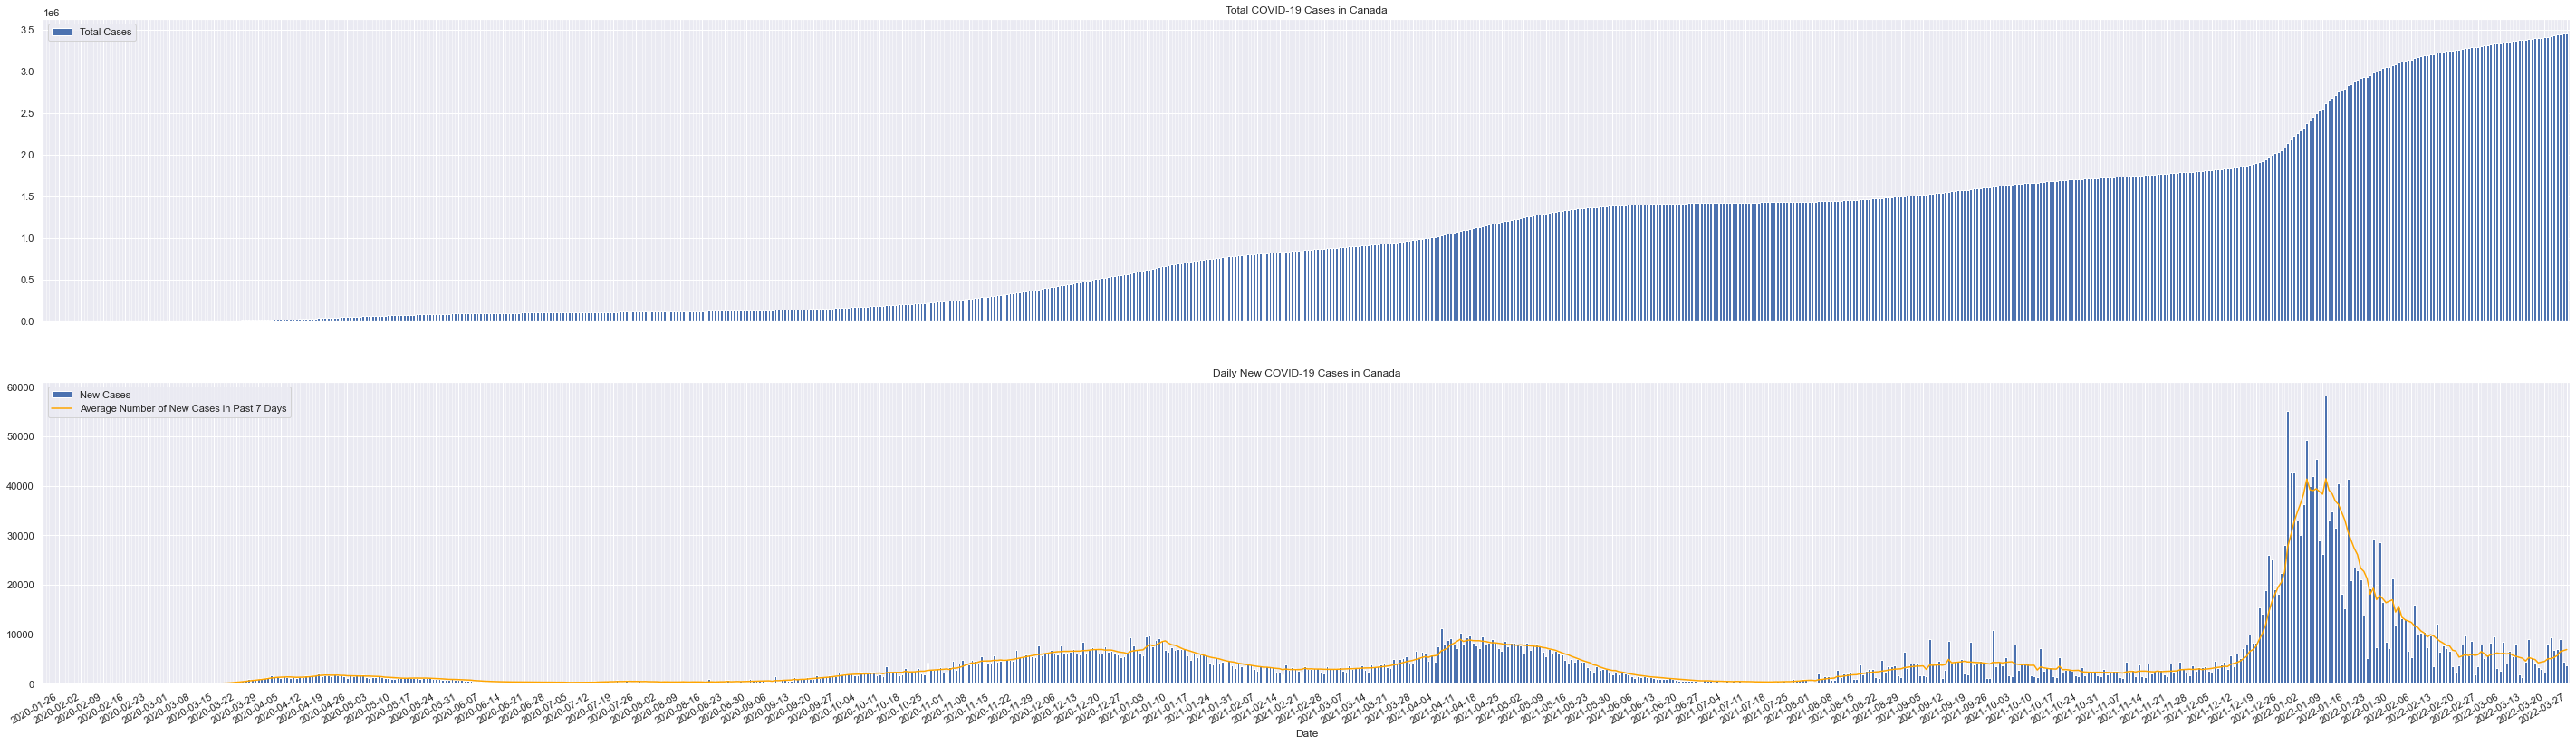

In [17]:
show_cnty_for_days(cnty='CAN', history=-1)

#### 5.1.2 Show the data of Hong Kong for the past 90 days

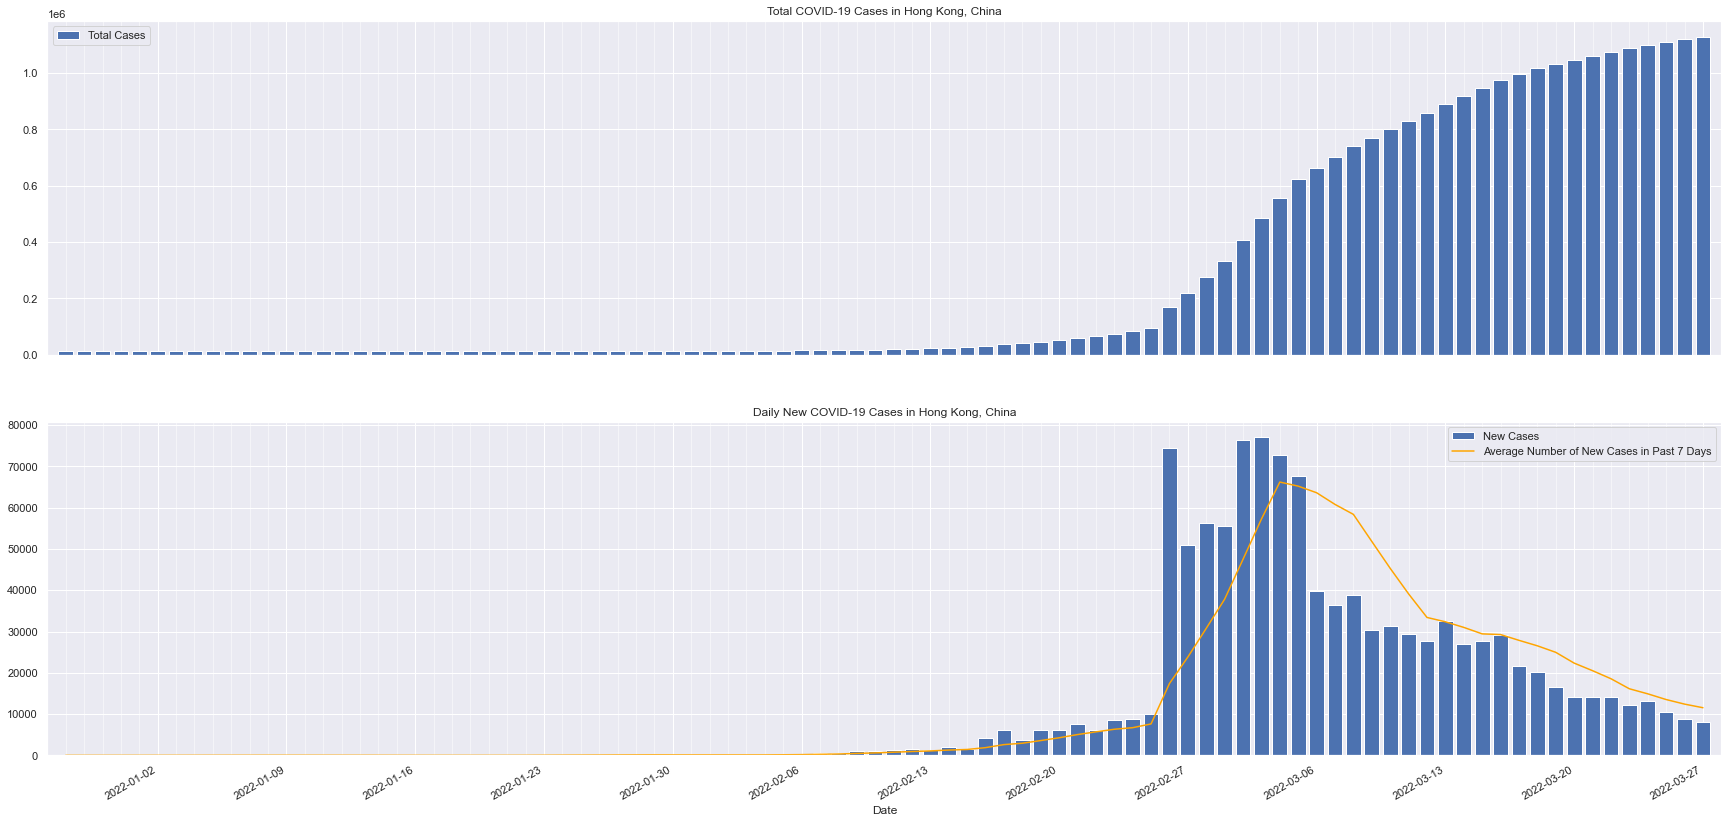

In [18]:
show_cnty_for_days(cnty='HKG', history=90)

### 5.2 Show the data of a list of Selected Countries/Regions.

#### 5.2.1 Show the data of Canada, the United States, the United Kingdom, Japan, Hong Kong, Italy and South Korea for the past 60 days

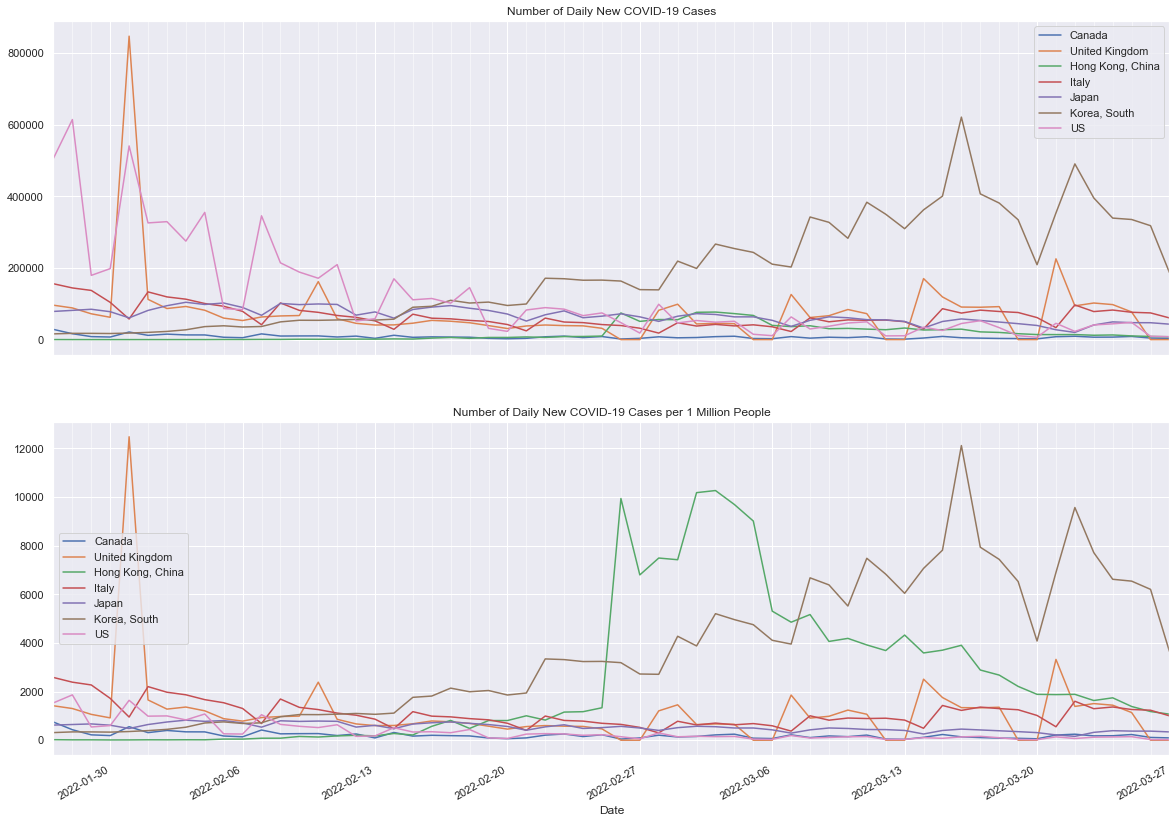

In [19]:
show_selected_cnty_with_per_million_for_days(cnty=['CAN', 'USA', 'GBR', 'JPN', 'HKG', 'ITA', 'KOR'], history=60)

#### 5.2.2 Show the data of France for the past 90 days

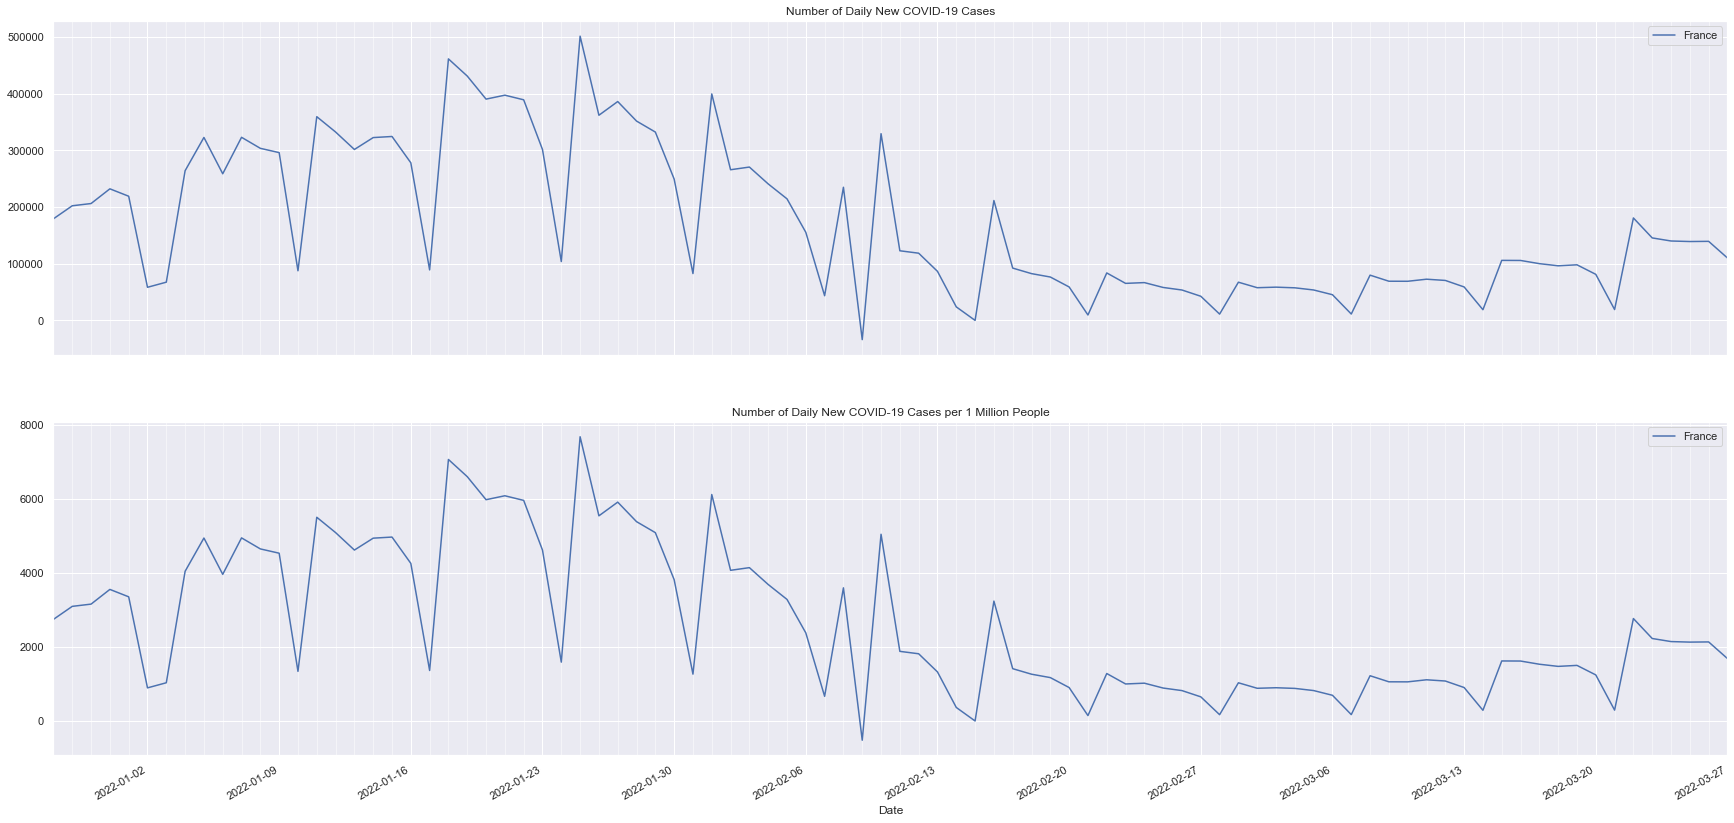

In [20]:
show_selected_cnty_with_per_million_for_days(cnty='FRA', history=90)

#### 5.2.3 Show the data of a country with invalid ```iso3``` (Canada will be shown instead) for the past 60 days

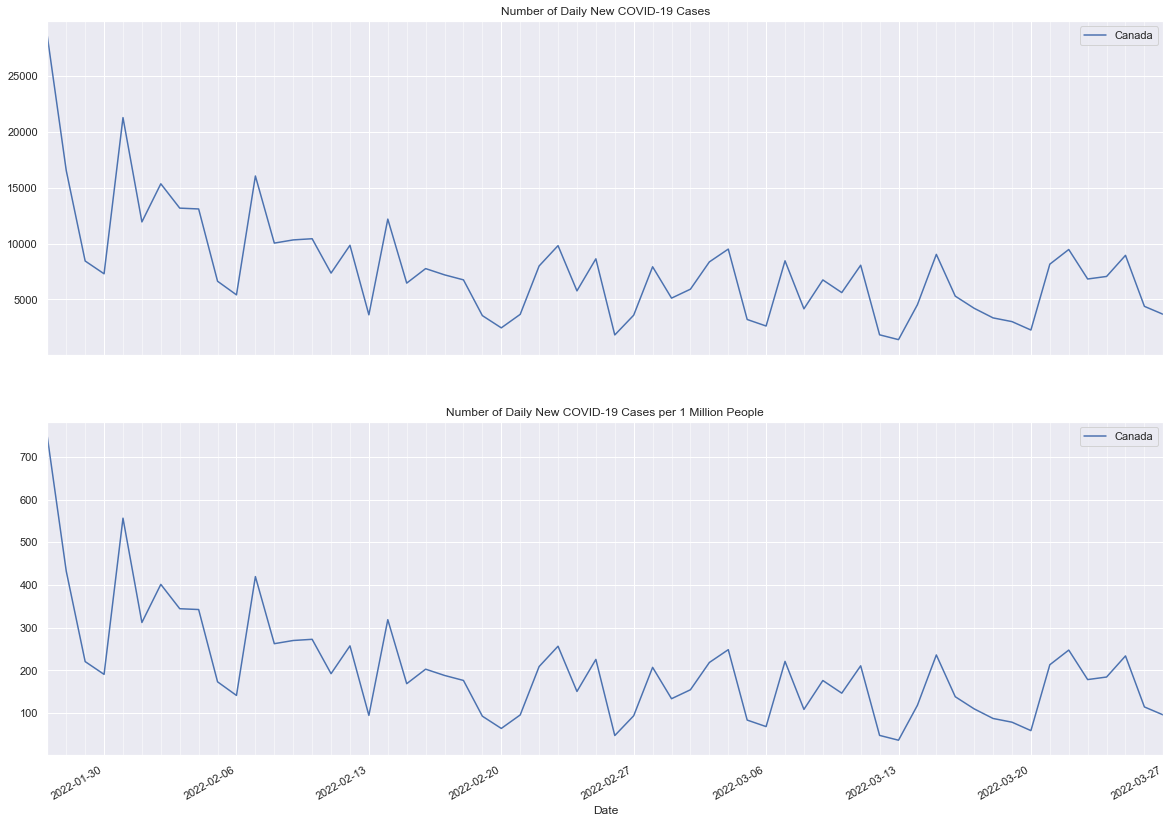

In [21]:
show_selected_cnty_with_per_million_for_days(cnty='AAA', history=60)

### 5.3 Show the Top n Countries/Regions with the Highest Average Number of New Cases

#### 5.3.1 Show the top 5 countries/regions with the highest average number of new daily cases in the past 14 days, in 60-day history charts

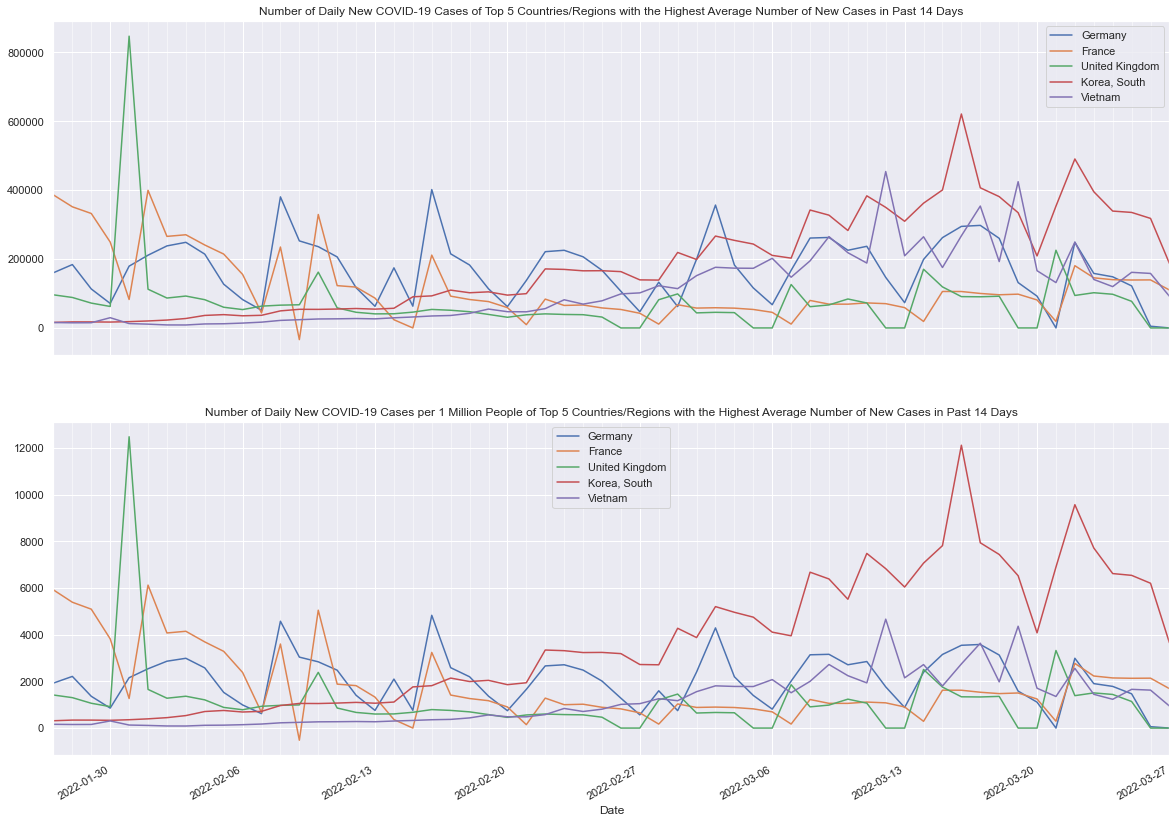

In [22]:
show_avg_highest_cases_for_days(per_1m=False, no_of_cnty=5, avg_cases=14, history=60)

#### 5.3.2 Show the top 5 countries/regions with the highest average number of new daily cases per 1 million people in the past 14 days, in 60-day history charts

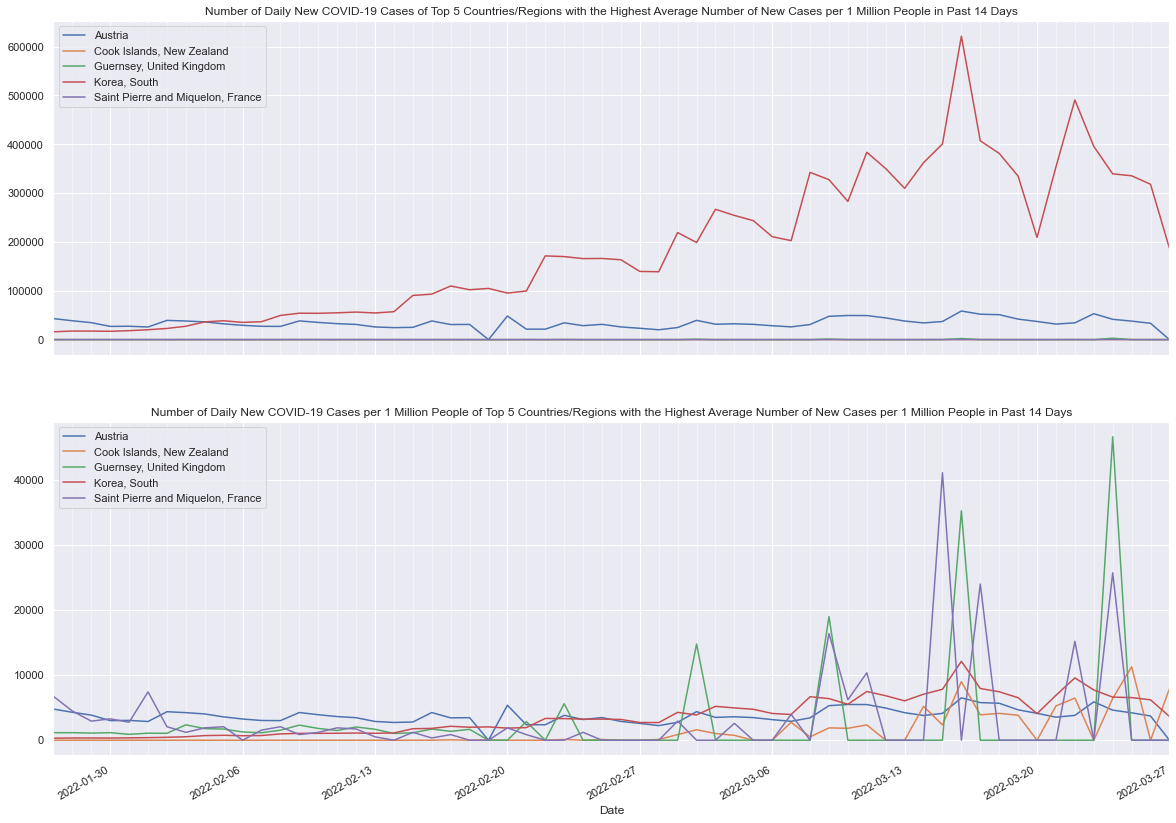

In [23]:
show_avg_highest_cases_for_days(per_1m=True, no_of_cnty=5, avg_cases=14, history=60)

### 5.4 Show the Top n Countries/Regions with the Highest Total Number of Cases

#### 5.4.1 Show the top 5 countries/regions for 90-day charts

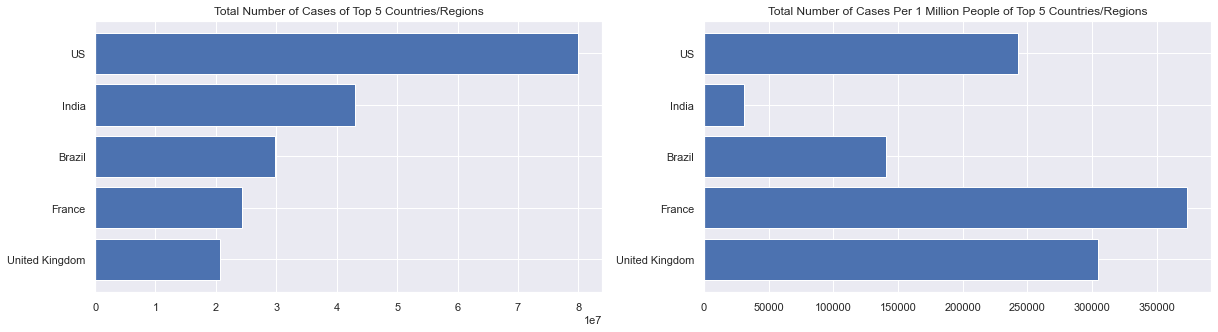

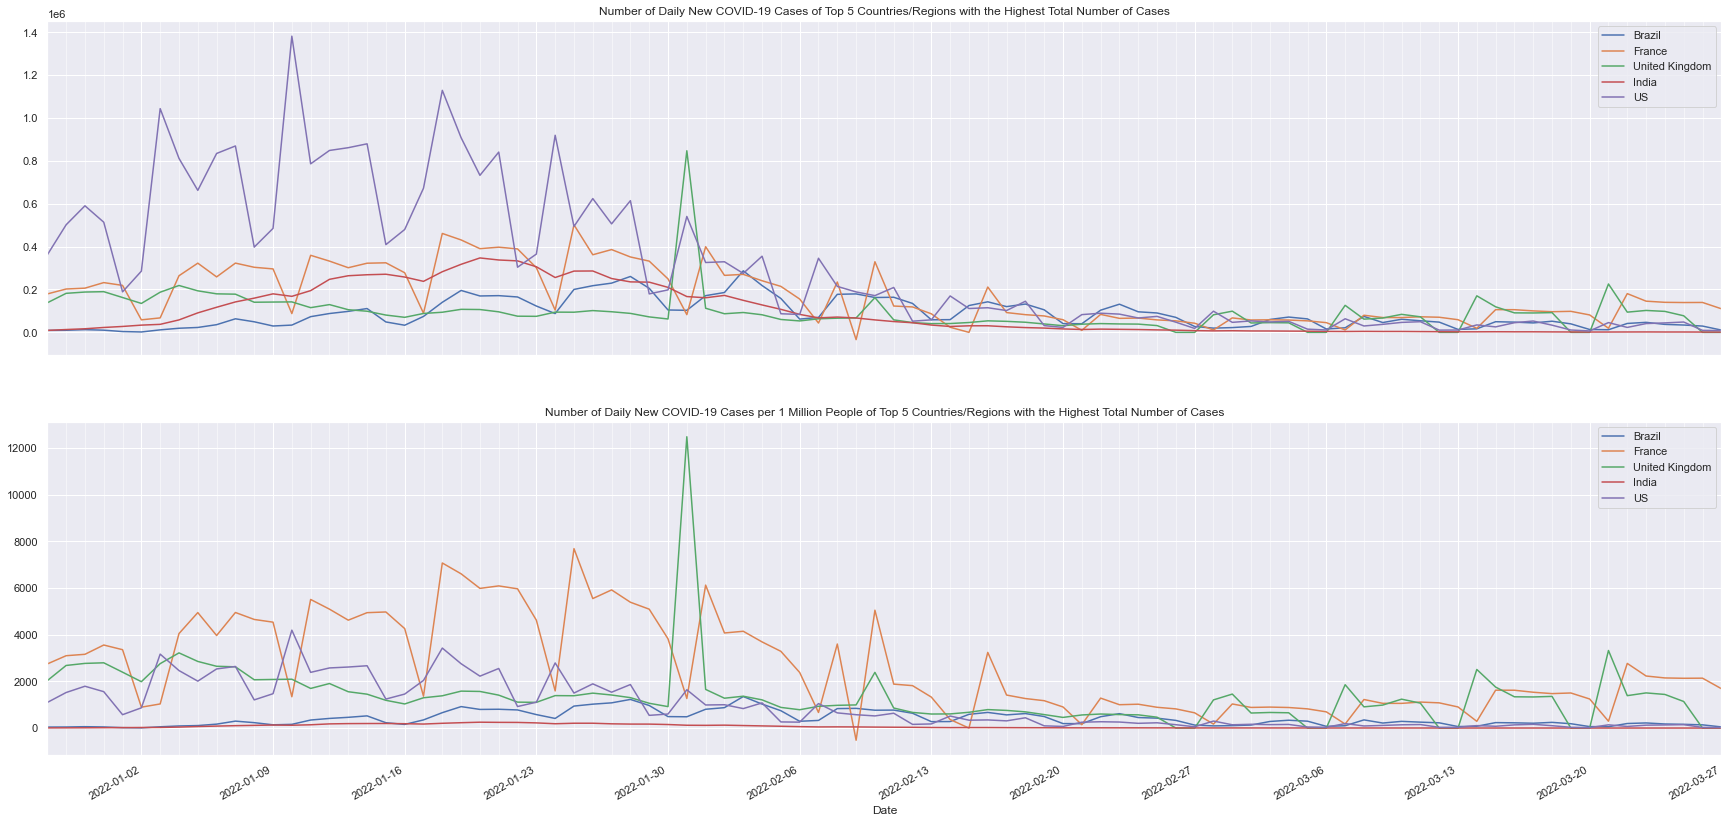

In [24]:
show_highest_cases_in_all_time(5, history=90)